<a href="https://colab.research.google.com/github/willtryagain/Rulkov-Map/blob/main/incm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling of spiking-bursting neural behavior using two-dimensional map


One of the complicating factors in understanding the simulation results is the complexity of temporal behaviour of individual biological neurons. The use of low-dimensional model maps can be useful for
understanding the dynamical mechanisms if they mimic the
dynamics of oscillations observed in real neurons, show correct restructuring of collective behavior, and are simple
enough to study the reasons behind such restructuring.
We consider a two-dimesionsional map 
$$
\begin{gathered}
x_{n+1}=f\left(x_{n}, y_{n}+\beta_{n}\right) \\
y_{n+1}=y_{n}-\mu\left(x_{n}+1\right)+\mu \sigma_{n}
\end{gathered}
$$
where $x_n$ is the fast and $y_n$ is the slow dynamical variable.

View on [colab](https://colab.research.google.com/drive/1aGBfpm0N5_HI2yJdY1ckBmNDMcdJxxhJ#scrollTo=Y9gasLgSfO3k)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

In [ ]:
def rulkov_map(x, y, beta, sigma, mu=0.001, alpha=4):
  """
  models the rulkov map 

  :x     : fast dynamical variable
  :y     : slow dynamical variable
  :beta  : external influence applied to map eg current
  :sigma : external influence applied to map eg current
  :return: updated variables
  """
  x_ =  f(x, y + beta, alpha)
  y_ = y - mu*(x + 1) + mu*sigma
  return x_, y_

def f(x, y,  alpha = 1):
  """
  nonlinear discontinuous function 
  
  :x     : fast dynamical variable
  :y     : slow dynamical variable
  :alpha : control parameter
  :return: updated fast variable
  """
  if x <= 0: return alpha/(1 - x) + y
  elif 0.0 < x < (alpha+y): return alpha + y
  else: return -1

# FIG. 1. 
The shape of the nonlinear function f(x,y), plotted for
$\alpha = $ 6.0 and $y =  -3.93$

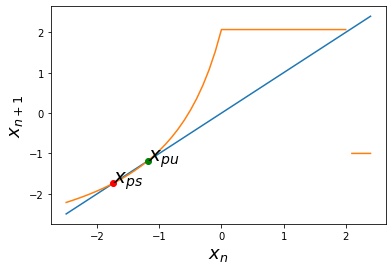

In [ ]:
x = Symbol('x')
alpha = 6.0
y = -3.93
# find the fixed points
roots = solve(alpha/(1-x)+y-x, x)

x = np.arange(-2.5, 2.5, 0.1)
x_ = [f(x_i, -3.93, 6.0) for x_i in x]
plt.plot(x, x)
pos = np.where(np.abs(np.diff(x_)) > 1)[0]+1
x = np.insert(x, pos, np.nan)
x_ = np.insert(x_, pos, np.nan)

plt.xlabel("$x_n$", fontsize=18)
plt.ylabel("$x_{n+1}$", fontsize=18)
plt.plot(x, x_)
plt.plot(roots[0],roots[0],'ro')
plt.text(roots[0],roots[0], '$x_{ps}$', fontsize=20)
plt.text(roots[1],roots[1], '$x_{pu}$', fontsize=20)
plt.plot(roots[1],roots[1],'go');


# FIG. 2. 
Wave forms of spiking behavior generated by map
with $\alpha = 4$. Figure (2a) shows the transition to the regime of silence
for $\sigma = -0.01$. The regimes of continuous tonic spiking are computed for $\sigma = 0.01$ (b) and $\sigma = 0.1$ (c).

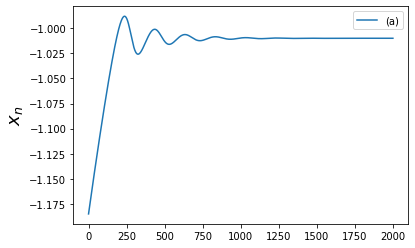

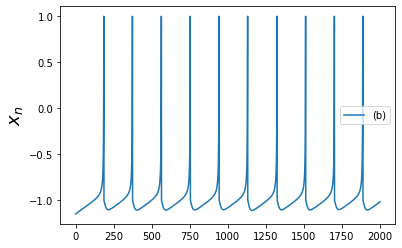

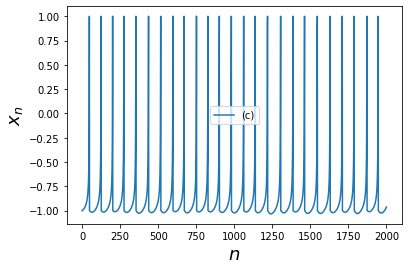

In [ ]:
# (a)

x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93

# apply the map
for _ in range(3000):
  x_, y_ = rulkov_map(x, y, beta, sigma=-0.01)
  x_n.append(x_)
  # update variables
  x, y = x_, y_

plt.plot(x_n[1000:], label="(a)")
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show();

# (b)
x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93
for _ in range(3000):
  x_, y_ = rulkov_map(x, y, beta,sigma= 0.01)
  x_n.append(x_)
  x, y = x_, y_
plt.plot(x_n[1000:], label="(b)")
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show();

# (c)
x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93
for _ in range(3000):
  x_, y_ = rulkov_map(x, y, beta, sigma=0.1)
  x_n.append(x_)
  x, y = x_, y_
plt.plot(x_n[1000:], label="(c)")
plt.xlabel("$n$", fontsize=18)
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show()

The frequency of the spikes increases as the value of parameter $\sigma$ is increased

# FIG. 3. 
Typical wave forms of the spiking-bursting behavior enerated by the map for the following parameter values: $\alpha$ $4.5, \quad \sigma=0.14$ (a); $\alpha=6.0, \quad \sigma=-0.1$ (b); and $\alpha=6.0, \quad \sigma$ $0.386$ (c).

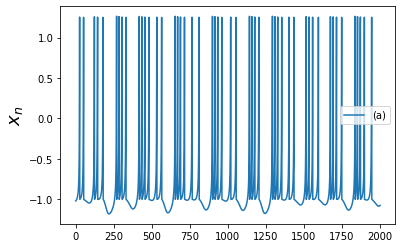

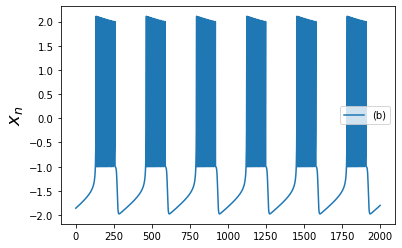

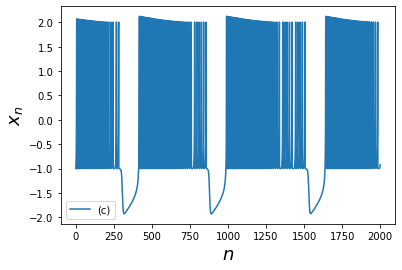

In [ ]:
# (a)
x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93
for _ in range(3000):
  x_, y_ = rulkov_map(x, y, beta, 0.14, alpha=4.5)
  x_n.append(x_)
  # print(x_, y_)
  x, y = x_, y_
plt.plot(x_n[1000:], label="(a)")
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show();

# (b)
x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93
for _ in range(3000 - 500):
  x_, y_ = rulkov_map(x, y, beta, -0.1, alpha=6)
  x_n.append(x_)
  # print(x_, y_)
  x, y = x_, y_
plt.plot(x_n[500:], label="(b)")
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show();

# (c)
x_n = [-1]
x = x_n[0]
beta = 0
y = -3.93
for _ in range(2000):
  x_, y_ = rulkov_map(x, y, beta, 0.386, alpha=6)
  x_n.append(x_)
  # print(x_, y_)
  x, y = x_, y_
plt.plot(x_n, label="(c)")
plt.xlabel("$n$", fontsize=18)
plt.ylabel("$x_n$", fontsize=18)
plt.legend()
plt.show()

For $\alpha > 4$ the map dynamics are capable of producing
bursts of spikes

# FIG. 4.

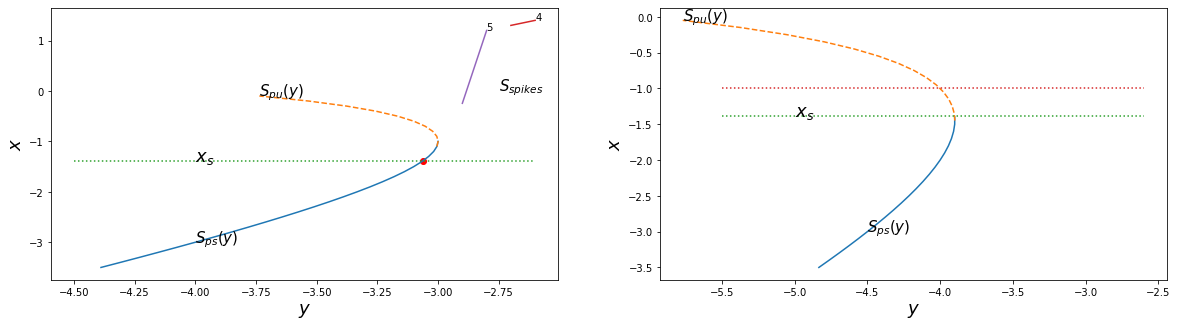

In [ ]:
# equation for the coordinate of fixed points x_p
def get_coords(x_p, alpha):
  return x_p - alpha/(1 - x_p)


def get_x_mean(y, k, alpha):
  x = -1
  x_list = []
  for i in range(k):
    x = f(x, y, alpha)
    x_list.append(x)
  return np.mean(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))


# stable branch and unstable branch are separated by x_p = 1 - sqrt(alpha)

# alpha = 4, then x_p = 1- 2 = -1
x_list = np.arange(-3.5, -1 + .1, 0.1)
y_list = []
for x in x_list:
  y_list.append(get_coords(x, 4))
ax1.plot(y_list, x_list)
ax1.text(y_list[5], x_list[5], "$S_{ps}(y)$", fontsize=15)
x_list = np.arange(-1.1, 0, 0.1)
y_list = []
for x in x_list:
  y_list.append(get_coords(x, 4))
ax1.plot(y_list, x_list, linestyle='--')
ax1.text(y_list[-1], x_list[-1], "$S_{pu}(y)$", fontsize=15)
#  when, x_s = -1 + sigma, y remains unchanged
sigma = -0.386
x_s = -1 + sigma
y_list = np.arange(-4.5, -2.5, 0.1)
x_list = [x_s] * len(y_list)
ax1.plot(y_list, x_list, linestyle=':')
ax1.text(y_list[5], x_list[5], "$x_s$", fontsize=18)
ax1.set_xlabel("$y$", fontsize=18)
ax1.set_ylabel("$x$", fontsize=18)
#OP
ax1.scatter(get_coords(x_s, 4), x_s, c='r')
for i in range(2):
  y_list = np.arange(-2.7- 0.2*i, -2.6-0.2*i, 0.1)
  x_list = [get_x_mean(y, i+4, 4) for y in y_list]
  ax1.plot(y_list, x_list)
  if i + 4 <= 6:
    ax1.text(y_list[-1], x_list[-1], f'{i+4}')
ax1.text(-2.75, 0, '$S_{spikes}$', fontsize=15)



# alpha = 6, then x_p = 1- root(6) = -1.449
x_list = np.arange(-3.5,  -1.449 + .1, 0.1)
y_list = []
for x in x_list:
  y_list.append(get_coords(x, 6))
ax2.plot(y_list, x_list)
ax2.text(y_list[5], x_list[5], "$S_{ps}(y)$", fontsize=15)
x_list = np.arange(-1.449, 0, 0.1)
y_list = []
for x in x_list:
  y_list.append(get_coords(x, 6))
ax2.plot(y_list, x_list, linestyle='--')
ax2.text(y_list[-1], x_list[-1], "$S_{pu}(y)$", fontsize=15)
#  when, x_s = -1 + sigma, y remains unchanged
sigma = -0.386
x_s = -1 + sigma
y_list = np.arange(-5.5, -2.5, 0.1)
x_list = [x_s] * len(y_list)
ax2.plot(y_list, x_list, linestyle=':')
ax2.text(y_list[5], x_list[5], "$x_s$", fontsize=18)
ax2.set_xlabel("$y$", fontsize=18)
ax2.set_ylabel("$x$", fontsize=18)
#OP


y_list = np.arange(-5.5, -2.5, 0.1)
x_list = [-1] * len(y_list)
ax2.plot(y_list, x_list, linestyle=':');







\begin{equation}
x_{\text {mean }}=\frac{1}{k} \sum_{m=1}^{k} f^{(m)}(-1, y)
\end{equation}

The homoclinic orbit forms at the value of y where the unstable branch $S_{pu}(y)$ crosses the line
$x = -1$ in Fig 4b

# FIG. 5. 
Bifurcation diagram on the parameter plane (s,a)

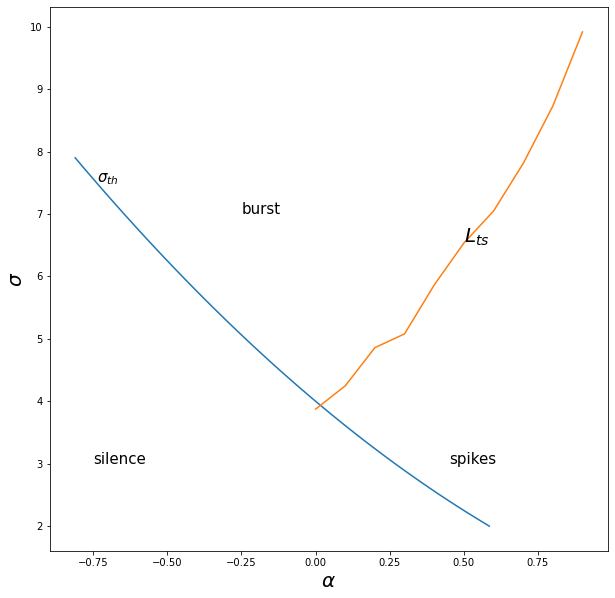

In [ ]:
plt.figure(figsize=(10,10))
plt.text(-.75, 3, "silence", fontsize=15)
plt.text(.45, 3, "spikes", fontsize=15)
plt.text(-.25, 7, "burst", fontsize=15)


alpha_list = np.arange(2, 8, 0.1)
sigma_list = [2 - np.sqrt(alpha) for alpha in alpha_list]
plt.plot(sigma_list, alpha_list)
plt.text(sigma_list[-5], alpha_list[-5], '$\sigma_{th}$', fontsize=15)


sigma_list = np.arange(0, 1, 0.1)
alpha_list = (sigma_list + 1)**3 + 3+ np.random.normal(0,0.1,len(sigma_list))
plt.text(sigma_list[5], alpha_list[5], '$L_{ts}$', fontsize=20)
plt.xlabel(r"$\alpha$", fontsize=20)
plt.ylabel(r"$\sigma$", fontsize=20)
plt.plot(sigma_list, alpha_list);

# FIG. 6. 

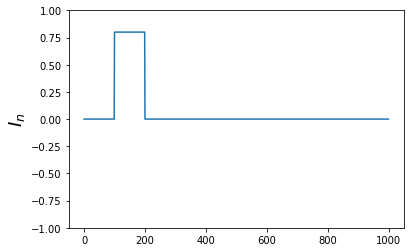

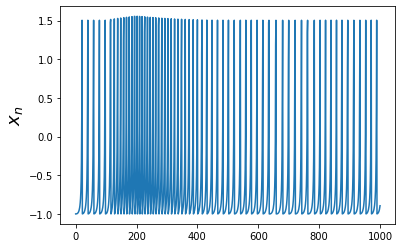

Text(0, 0.5, '$y_n$')

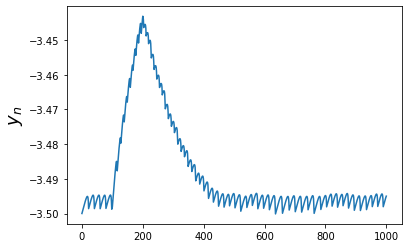

In [ ]:
n = np.arange(0, 1000, 1)
I = np.zeros(1000)
I[100:200] = 0.8
plt.plot(n, I)
plt.ylim(-1, 1)
plt.ylabel("$I_n$", fontsize=18)
plt.show()

x_n = [-1]
y_n = [-3.5]
x = x_n[0]
beta = 0
y = y_n[0]
for i in range(1000):

  x_, y_ = rulkov_map(x, y, beta,sigma= 0.33+I[i], alpha=5)
  x_n.append(x_)
  y_n.append(y_)

  x, y = x_, y_
plt.plot(x_n)
plt.ylabel("$x_n$", fontsize=18)
plt.show();
plt.plot(y_n)
plt.ylabel("$y_n$", fontsize=18)

# FIG. 7.

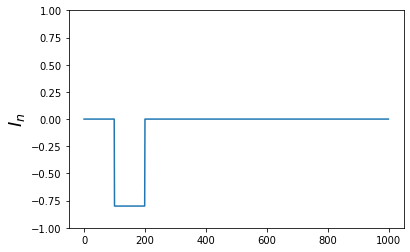

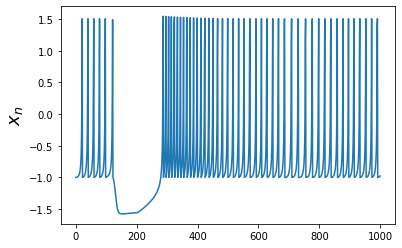

Text(0, 0.5, '$y_n$')

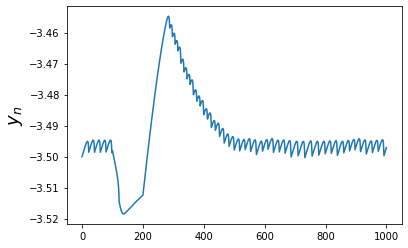

In [ ]:
n = np.arange(0, 1000, 1)
I = np.zeros(1000)
I[100:200] = -0.8
plt.plot(n, I)
plt.ylim(-1, 1)
plt.ylabel("$I_n$", fontsize=18)
plt.show()

x_n = [-1]
y_n = [-3.5]
x = x_n[0]
beta = 0
y = y_n[0]
for i in range(1000):

  x_, y_ = rulkov_map(x, y, beta,sigma= 0.33+I[i], alpha=5)
  x_n.append(x_)
  y_n.append(y_)

  x, y = x_, y_
plt.plot(x_n)
plt.ylabel("$x_n$", fontsize=18)
plt.show();
plt.plot(y_n)
plt.ylabel("$y_n$", fontsize=18)

# FIG. 8.

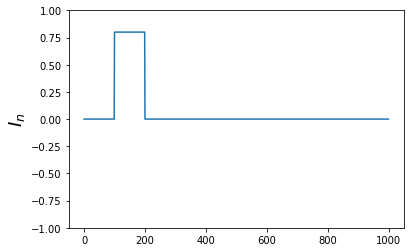

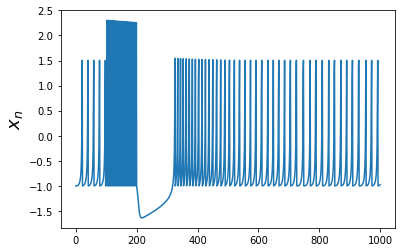

Text(0, 0.5, '$y_n$')

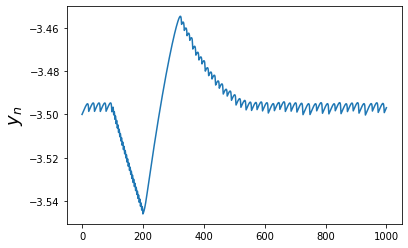

In [ ]:
n = np.arange(0, 1000, 1)
I = np.zeros(1000)
I[100:200] = 0.8
plt.plot(n, I)
plt.ylim(-1, 1)
plt.ylabel("$I_n$", fontsize=18)
plt.show()

x_n = [-1]
y_n = [-3.5]
x = x_n[0]
beta = 0
y = y_n[0]
for i in range(1000):

  x_, y_ = rulkov_map(x, y, beta+I[i],sigma= 0.33+I[i], alpha=5)
  x_n.append(x_)
  y_n.append(y_)

  x, y = x_, y_
plt.plot(x_n)
plt.ylabel("$x_n$", fontsize=18)
plt.show();
plt.plot(y_n)
plt.ylabel("$y_n$", fontsize=18)

# FIG. 9.

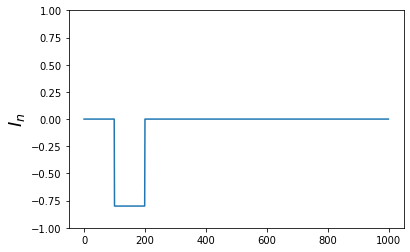

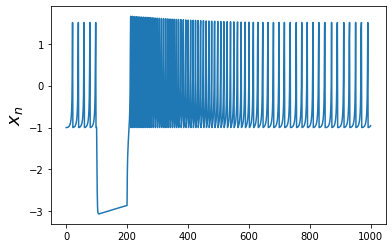

Text(0, 0.5, '$y_n$')

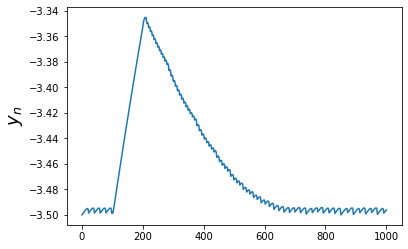

In [ ]:
n = np.arange(0, 1000, 1)
I = np.zeros(1000)
I[100:200] = -0.8
plt.plot(n, I)
plt.ylim(-1, 1)
plt.ylabel("$I_n$", fontsize=18)
plt.show()

x_n = [-1]
y_n = [-3.5]
x = x_n[0]
beta = 0
y = y_n[0]
for i in range(1000):

  x_, y_ = rulkov_map(x, y, beta+I[i],sigma= 0.33+I[i], alpha=5)
  x_n.append(x_)
  y_n.append(y_)

  x, y = x_, y_
plt.plot(x_n)
plt.ylabel("$x_n$", fontsize=18)
plt.show();
plt.plot(y_n)
plt.ylabel("$y_n$", fontsize=18)

# FIG. 10.

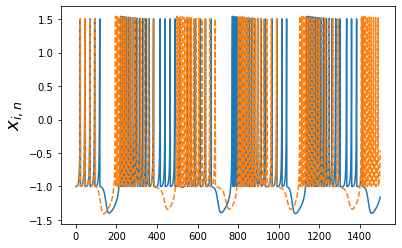

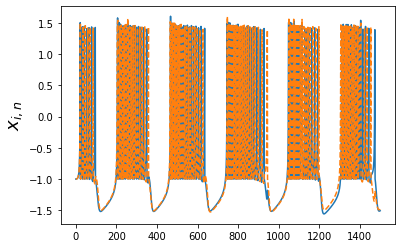

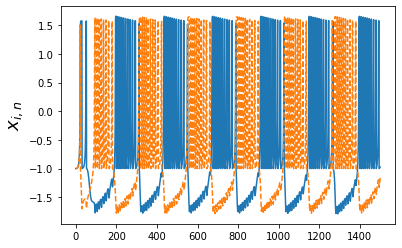

In [ ]:
x_n = [[-1, -1]]
y_n = [[-3.5, -3.5]]
beta = 0
g = 0

for i in range(1500):
  beta_1 = g*(x_n[-1][1] - x_n[-1][0])
  beta_2 = g*(x_n[-1][0] - x_n[-1][1])

  x_1, y_1 = rulkov_map(x_n[-1][0], y_n[-1][0], beta+beta_1,sigma= 0.24+beta_1, alpha=5)
  x_2, y_2 = rulkov_map(x_n[-1][1], y_n[-1][1], beta+beta_2,sigma= 0.245+beta_2, alpha=5)


  x_n.append([x_1, x_2])
  y_n.append([y_1, y_2])

x_n = np.array(x_n)
plt.plot(x_n[:, 0])
plt.plot(x_n[:, 1], linestyle='--')
plt.ylabel("$x_{i, n}$", fontsize=18)
plt.show();

# b
x_n = [[-1, -1]]
y_n = [[-3.5, -3.5]]
beta = 0
g = 0.043

for i in range(1500):
  beta_1 = g*(x_n[-1][1] - x_n[-1][0])
  beta_2 = g*(x_n[-1][0] - x_n[-1][1])

  x_1, y_1 = rulkov_map(x_n[-1][0], y_n[-1][0], beta+beta_1,sigma= 0.24+beta_1, alpha=5)
  x_2, y_2 = rulkov_map(x_n[-1][1], y_n[-1][1], beta+beta_2,sigma= 0.245+beta_2, alpha=5)


  x_n.append([x_1, x_2])
  y_n.append([y_1, y_2])

x_n = np.array(x_n)
plt.plot(x_n[:, 0])
plt.plot(x_n[:, 1], linestyle='--')
plt.ylabel("$x_{i, n}$", fontsize=18)
plt.show();

# c
# b
x_n = [[-1, -1]]
y_n = [[-3.5, -3.5]]
beta = 0
g = -0.029

for i in range(1500):
  beta_1 = g*(x_n[-1][1] - x_n[-1][0])
  beta_2 = g*(x_n[-1][0] - x_n[-1][1])

  x_1, y_1 = rulkov_map(x_n[-1][0], y_n[-1][0], beta+beta_1,sigma= 0.24+beta_1, alpha=5)
  x_2, y_2 = rulkov_map(x_n[-1][1], y_n[-1][1], beta+beta_2,sigma= 0.245+beta_2, alpha=5)


  x_n.append([x_1, x_2])
  y_n.append([y_1, y_2])

x_n = np.array(x_n)
plt.plot(x_n[:, 0])
plt.plot(x_n[:, 1], linestyle='--')
plt.ylabel("$x_{i, n}$", fontsize=18)
plt.show();

\begin{equation}
\begin{gathered}
x_{i, n+1}=f\left(x_{i, n}, y_{i, n}+\beta_{i, n}\right), \\
y_{i, n+1}=y_{i, n}-\mu\left(x_{i, n}+1\right)+\mu \sigma_{i}+\mu \sigma_{i, n},
\end{gathered}
\end{equation}
\begin{equation}
\begin{aligned}
&\beta_{i, n}=g_{j i} \beta^{e}\left(x_{j, n}-x_{i, n}\right), \\
&\sigma_{i, n}=g_{j i} \sigma^{e}\left(x_{j, n}-x_{i, n}\right),
\end{aligned}
\end{equation}

# FIG. 12.

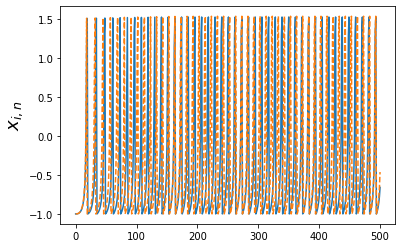

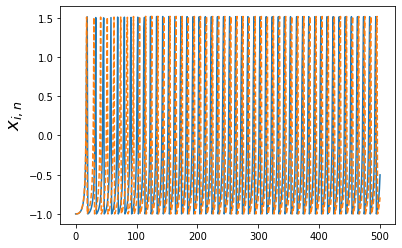

In [ ]:
x_n = [[-1, -1]]
y_n = [[-3.5, -3.5]]
beta = 0
g = 0

for i in range(500):
  beta_1 = g*(x_n[-1][1] - x_n[-1][0])
  beta_2 = g*(x_n[-1][0] - x_n[-1][1])

  x_1, y_1 = rulkov_map(x_n[-1][0], y_n[-1][0], beta+beta_1,sigma= 0.653+beta_1, alpha=5)
  x_2, y_2 = rulkov_map(x_n[-1][1], y_n[-1][1], beta+beta_2,sigma= 0.714+beta_2, alpha=5)


  x_n.append([x_1, x_2])
  y_n.append([y_1, y_2])

x_n = np.array(x_n)
plt.plot(x_n[:, 0])
plt.plot(x_n[:, 1], linestyle='--')
plt.ylabel("$x_{i, n}$", fontsize=18)
plt.show();

# b
x_n = [[-1, -1]]
y_n = [[-3.5, -3.5]]
beta = 0
g = 0.008

for i in range(500):
  beta_1 = g*(x_n[-1][1] - x_n[-1][0])
  beta_2 = g*(x_n[-1][0] - x_n[-1][1])

  x_1, y_1 = rulkov_map(x_n[-1][0], y_n[-1][0], beta+beta_1,sigma= 0.653+beta_1, alpha=5)
  x_2, y_2 = rulkov_map(x_n[-1][1], y_n[-1][1], beta+beta_2,sigma= 0.714+beta_2, alpha=5)


  x_n.append([x_1, x_2])
  y_n.append([y_1, y_2])

x_n = np.array(x_n)
plt.plot(x_n[:, 0])
plt.plot(x_n[:, 1], linestyle='--')
plt.ylabel("$x_{i, n}$", fontsize=18)
plt.show();

